In [30]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib
import functions_spills

importlib.reload(functions_nHits)
importlib.reload(functions_spills)

%matplotlib inline

In [31]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree = file["WCTEReadoutWindows"]  

times_branch = tree["hit_pmt_calibrated_times"].array()
charge_branch = tree["hit_pmt_charges"].array()

times_branch_sorted, times_branch_sorted_TOF, charge_branch_sorted, mpmt_id_branch_sorted, event_number_branch = functions_spills.initial_treatment(tree)


In [32]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree_sig = file["WCTEReadoutWindows"]  

times_branch_sig = tree_sig["hit_pmt_calibrated_times"].array()
charge_branch_sig = tree_sig["hit_pmt_charges"].array()

times_branch_sorted_sig, times_branch_sorted_TOF_sig, charge_branch_sorted_sig, mpmt_id_branch_sorted_sig, event_number_branch_sig = functions_spills.initial_treatment(tree_sig)

In [33]:
times_branch_modified, threshold_times, deleted_index_dict = functions_spills.repeat_spills_nHits(event_number_branch, times_branch_sorted_TOF, 300, 5000, 5000)
times_branch_modified_sig, threshold_times_sig, deleted_index_dict_sig = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_branch_sorted_TOF_sig, 300, 5000, 5000)


In [34]:
charge_branch_filtered = functions_spills.delete_indices_list(charge_branch_sorted, deleted_index_dict)
charge_branch_filtered_sig = functions_spills.delete_indices_list(charge_branch_sorted_sig, deleted_index_dict_sig)

In [35]:
times_branch_modified_chargesTT, charge_branch_modified_chargesTT, threshold_charges, deleted_indices = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_modified, charge_branch_filtered, 50, 5000, threshold = 5000)
times_branch_modified_chargesTT_sig, charge_branch_modified_chargesTT_sig, threshold_charges_sig, deleted_indices_sig = functions_spills.repeat_spills_Charge(event_number_branch_sig, times_branch_modified_sig, charge_branch_filtered_sig, 50, 5000, threshold = 5000)

In [36]:
print(threshold_charges)

{7: [160646.69965204532], 13: [209090.52410623746], 21: [195197.33072523933], 72: [4197.088150849084], 87: [171999.80960563247, 193179.86314996652], 89: [125266.6683564509], 102: [46345.6649449645], 110: [212907.48033199584], 120: [83078.92420966277], 148: [226380.47834647182], 184: [207317.67511380592], 200: [22905.77600543527], 203: [156176.2518939893], 209: [100898.65174190603], 215: [14781.1083215375], 228: [175390.7463832087], 230: [81766.19008496653], 244: [86640.20762587896], 276: [239796.101506641], 278: [210856.08330332587], 279: [268516.14689590404], 294: [116467.1317894014], 320: [130271.47970171773], 321: [41797.13606341759], 326: [128529.37765802181], 341: [162740.01148889246], 342: [108738.13179459248], 360: [33253.97797611576], 382: [139411.37536186117], 389: [94820.26573759536, 151990.48782325027], 394: [94285.16818936425], 395: [3933.760159808248], 399: [55519.143129260585], 422: [113795.85017071856], 427: [195282.4561703125], 439: [12790.276098833705], 451: [231377.81

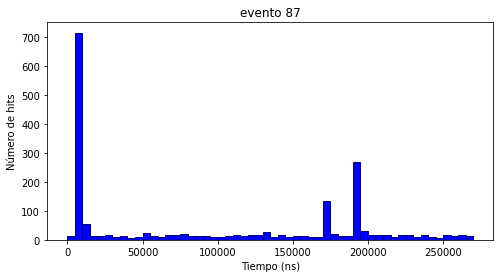

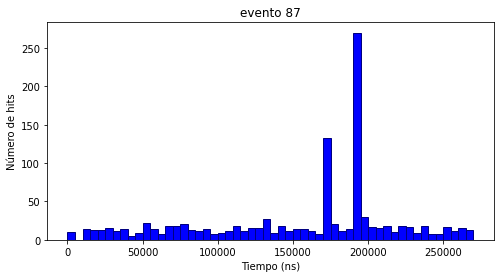

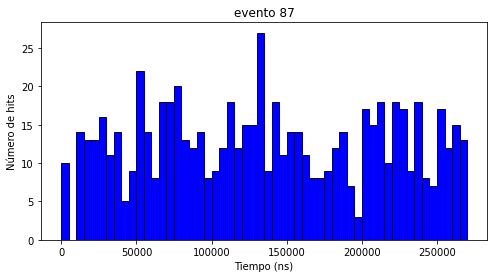

In [37]:
event_number = 87

plt.figure(figsize=(8, 4))
plt.hist(times_branch_sorted_TOF[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()


plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified_chargesTT[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

In [38]:
nDetections_event_in = []
nDetections_event_fin = []

nDetections_event_in_sig = []
nDetections_event_fin_sig = []

for x in times_branch_sorted_TOF:
    nDetections_event_in.append(len(x))

for x in times_branch_modified_chargesTT:
    nDetections_event_fin.append(len(x))

for x in times_branch_sorted_TOF_sig:
    nDetections_event_in_sig.append(len(x))

for x in times_branch_modified_chargesTT_sig:
    nDetections_event_fin_sig.append(len(x))

In [39]:
n_bins = 50

N_events = tree.num_entries
N_events_sig = tree_sig.num_entries

hist_in, bin_edges = np.histogram(nDetections_event_in, bins=n_bins)
hist_in_sig, _ = np.histogram(nDetections_event_in_sig, bins=bin_edges)  # usa los mismos bordes

hist_filtered, _ = np.histogram(nDetections_event_fin, bins = bin_edges)
hist_filtered_sig, _ = np.histogram(nDetections_event_fin_sig, bins = bin_edges)

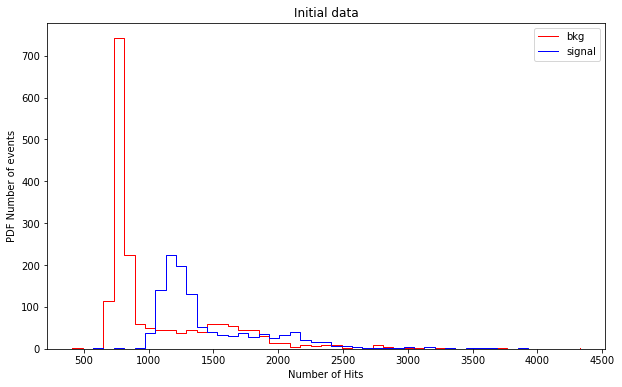

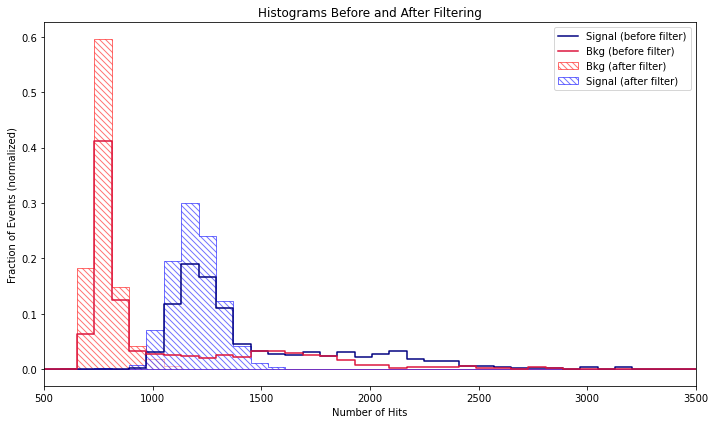

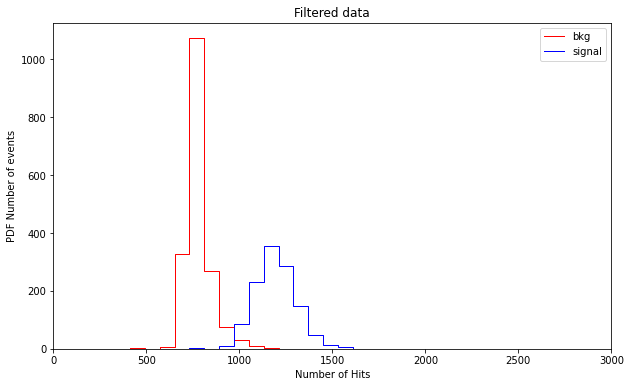

In [42]:
plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges[:-1], hist_in, where='post', linewidth=1, label='bkg', color='red')
plt.step(bin_edges[:-1], hist_in_sig, where='post', linewidth=1, label='signal', color='blue')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('PDF Number of events')
plt.title('Initial data')
#plt.xlim(0, 3000)
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.fill_between(bin_edges[:-1], hist_filtered / N_events, hatch='\\\\\\\\', step='post', color='white', edgecolor='red', alpha=0.55, label='Bkg (after filter)')
plt.fill_between(bin_edges[:-1], hist_filtered_sig / N_events_sig, hatch='\\\\\\\\', step='post', color='white', edgecolor='blue', alpha=0.55, label='Signal (after filter)')
plt.step(bin_edges[:-1], hist_in_sig / N_events_sig, where='post', color='navy', linestyle='-', linewidth=1.5, label='Signal (before filter)')
plt.step(bin_edges[:-1], hist_in / N_events, where='post', color='crimson', linestyle='-', linewidth=1.5, label='Bkg (before filter)')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Fraction of Events (normalized)')
plt.title('Histograms Before and After Filtering')
plt.tight_layout()
plt.xlim(500, 3500)
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges[:-1], hist_filtered, linewidth = 1, where='post', label='bkg', color='red')
plt.step(bin_edges[:-1], hist_filtered_sig, linewidth = 1, where='post', label='signal', color='blue')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('PDF Number of events')
plt.title('Filtered data')
plt.xlim(0, 3000)
plt.show()

In [12]:
bin_window = 4000

nHits_tot = functions_spills.counting_nHits_window(event_number_branch, times_branch_modified_chargesTT, bin_window)
nHits_in = functions_spills.counting_nHits_window(event_number_branch, times_branch_sorted_TOF, bin_window)

nHits_tot_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_modified_chargesTT_sig, bin_window)
nHits_in_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_sorted_TOF_sig, bin_window)

In [13]:
hist_in, bin_edges = np.histogram(nHits_in, bins=100, range=(0, 500))
hist_in_sig, _ = np.histogram(nHits_in_sig, bins=bin_edges)  # usa los mismos bordes

hist_filtered, _ = np.histogram(nHits_tot, bins = bin_edges)
hist_filtered_sig, _ = np.histogram(nHits_tot_sig, bins = bin_edges)

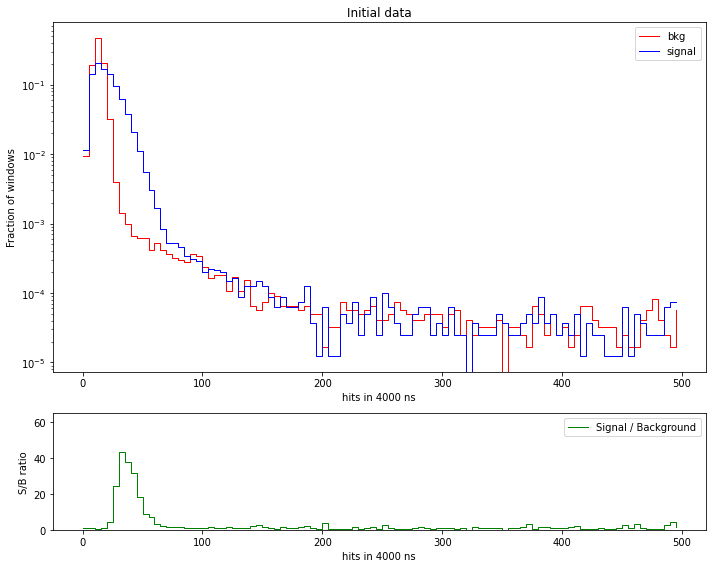

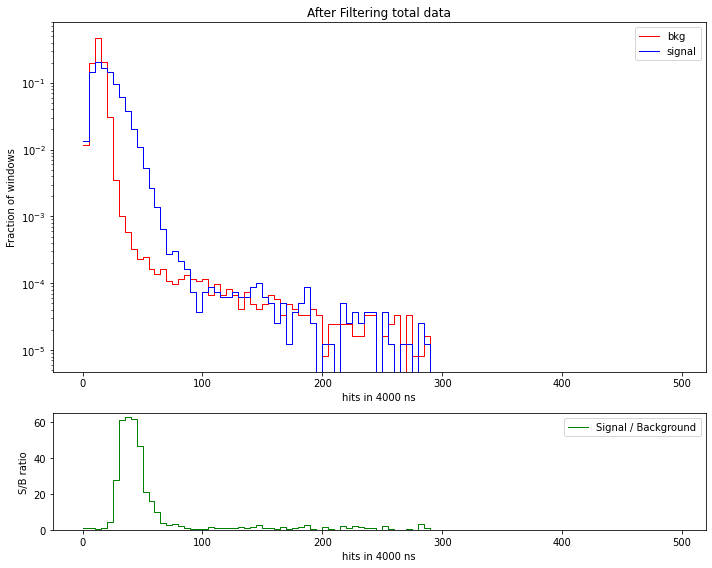

In [14]:
n_windows_ev = 270000 / bin_window

fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bin_edges[:-1], hist_in / (N_events * n_windows_ev), linewidth = 1, where='post', label='bkg', color='red')
axs[0].step(bin_edges[:-1], hist_in_sig / (N_events_sig * n_windows_ev), linewidth = 1, where='post', label='signal', color='blue')

axs[0].set_ylabel("Fraction of windows")
axs[0].set_xlabel(f"hits in {bin_window} ns")
axs[0].set_title("Initial data")
axs[0].set_yscale('log')
axs[0].legend()

# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_in_sig / (N_events_sig * n_windows_ev),
    hist_in / (N_events * n_windows_ev),
    out=np.full_like(hist_in, 0, dtype=float),
    where=hist_in > 0)
axs[1].step(bin_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel(f"hits in {bin_window} ns")
axs[1].set_ylabel("S/B ratio")
axs[1].legend()
axs[1].set_ylim(0, 65)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bin_edges[:-1], hist_filtered / (N_events * n_windows_ev), linewidth = 1, where='post', label='bkg', color='red')
axs[0].step(bin_edges[:-1], hist_filtered_sig / (N_events_sig * n_windows_ev), linewidth = 1, where='post', label='signal', color='blue')
axs[0].set_ylabel("Fraction of windows")
axs[0].set_xlabel(f"hits in {bin_window} ns")
axs[0].set_title("After Filtering total data")
axs[0].set_yscale('log')
axs[0].legend()

# Bottom plot: Signal/Background Ratio
ratio_2 = np.divide(
    hist_filtered_sig / (N_events_sig * n_windows_ev),
    hist_filtered / (N_events * n_windows_ev),
    out=np.full_like(hist_filtered, 0, dtype=float),
    where=hist_filtered > 0)
axs[1].step(bin_edges[:-1], ratio_2, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel(f"hits in {bin_window} ns")
axs[1].set_ylabel("S/B ratio")
axs[1].legend()
axs[1].set_ylim(0, 65)
plt.tight_layout()
plt.show()


In [15]:
threshold_times_50 = functions_spills.prompt_candidates(event_number_branch, times_branch_modified_chargesTT, 100, 200, 10, 50)
threshold_times_50_sig = functions_spills.prompt_candidates(event_number_branch_sig, times_branch_modified_chargesTT_sig, 100, 200, 10, 50)

Not using trigger 40708.97043431913 because it has other signal_candidate too close in event 2
Not using trigger 131153.89398269335 because it has other signal_candidate too close in event 16
Not using trigger 188167.25964723207 because it has other signal_candidate too close in event 19
Not using trigger 253852.66078907796 because it has other signal_candidate too close in event 19
Not using trigger 136832.9385322644 because it has other signal_candidate too close in event 35
Not using trigger 77323.22182111173 because it has other signal_candidate too close in event 43
Not using trigger 92126.45450317912 because it has other signal_candidate too close in event 46
Not using trigger 182718.70876062402 because it has other signal_candidate too close in event 56
Not using trigger 109321.037468351 because it has other signal_candidate too close in event 63
Not using trigger 138263.75832338262 because it has other signal_candidate too close in event 73
Not using trigger 209102.70289178766 

In [16]:
print(threshold_times_50_sig)

total = sum(len(lista) for lista in threshold_times_50.values())
print("Total de elementos en todas las listas:", total)

total = sum(len(lista) for lista in threshold_times_50_sig.values())
print("Total de elementos en todas las listas:", total)


{0: [173419.59429004797], 2: [105350.41497222228], 6: [137162.1998409207], 9: [89868.15052268506], 10: [224146.84127213727], 11: [189218.65378835282, 228115.837841617], 12: [138815.36196319238, 155180.8227398277, 177495.1964535463, 192311.44405622475], 13: [14404.670389199531], 17: [22211.2534171625], 18: [109288.08283023477], 25: [74283.84189384435, 146989.55924966244], 26: [2860.5894205609366, 132044.46053607078, 252526.6037927086], 28: [49733.82082799895], 34: [61372.38467752161], 36: [158963.36508688936], 38: [49943.35939266451, 102154.77605849202], 39: [227767.57433576207], 43: [105305.5280387973], 45: [149556.5321455078], 46: [7695.393718625066, 51292.91973151974, 124161.50787458428, 148485.87315326204], 47: [160477.26305757381], 48: [27113.605210891885, 179211.54387487166], 49: [173576.90382548736, 221967.53153192007], 51: [87790.98924074497], 52: [48283.21615404427], 54: [207098.08838562536], 55: [67272.28749425229, 234150.57084952612], 56: [173132.40605328872], 57: [148077.150

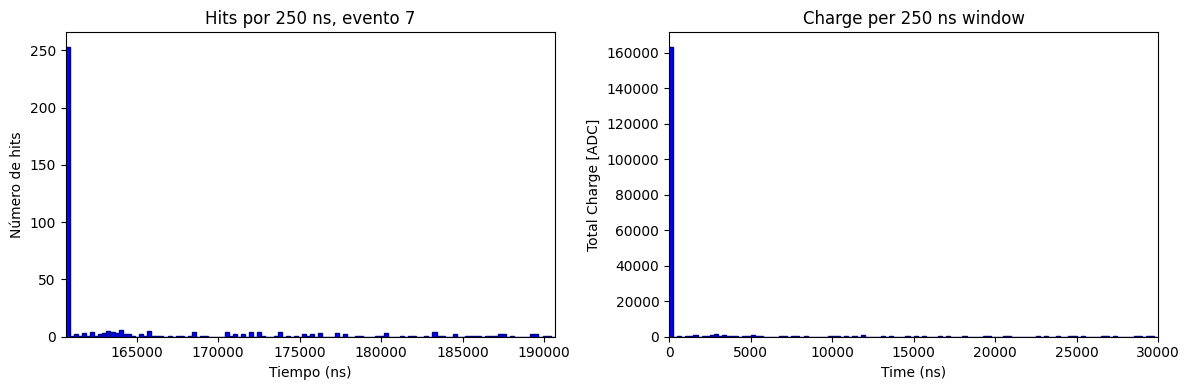

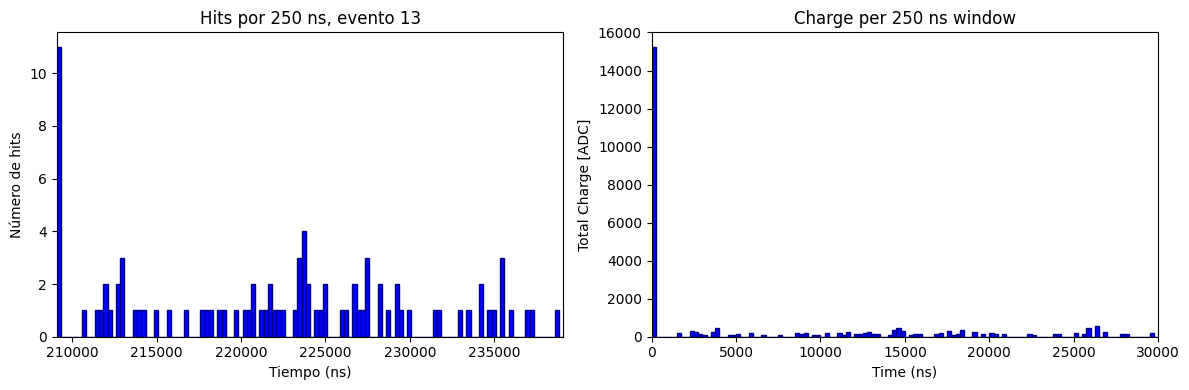

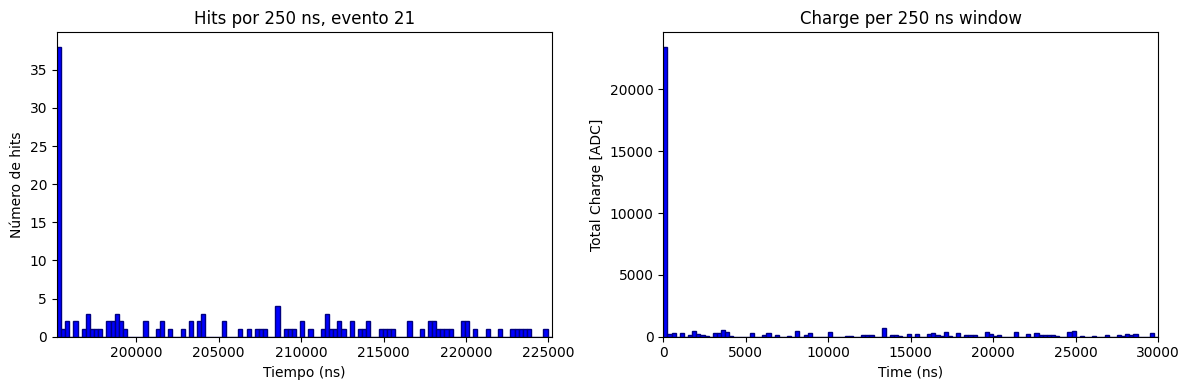

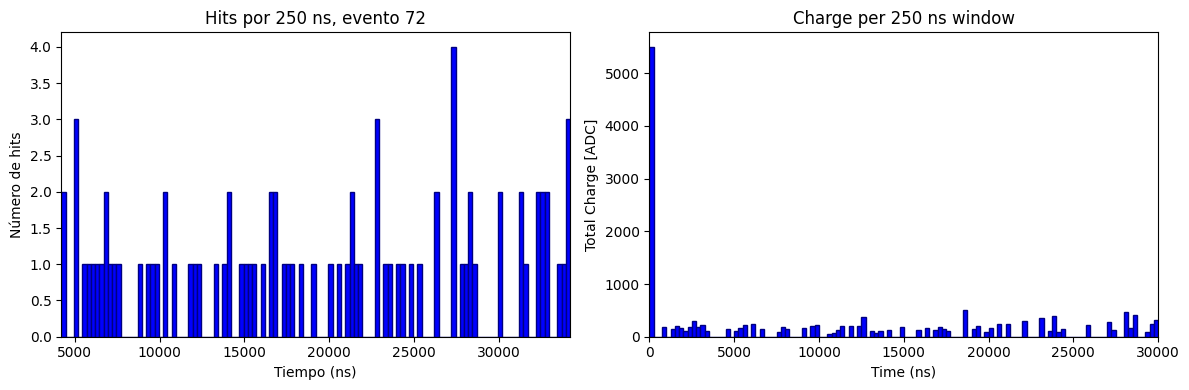

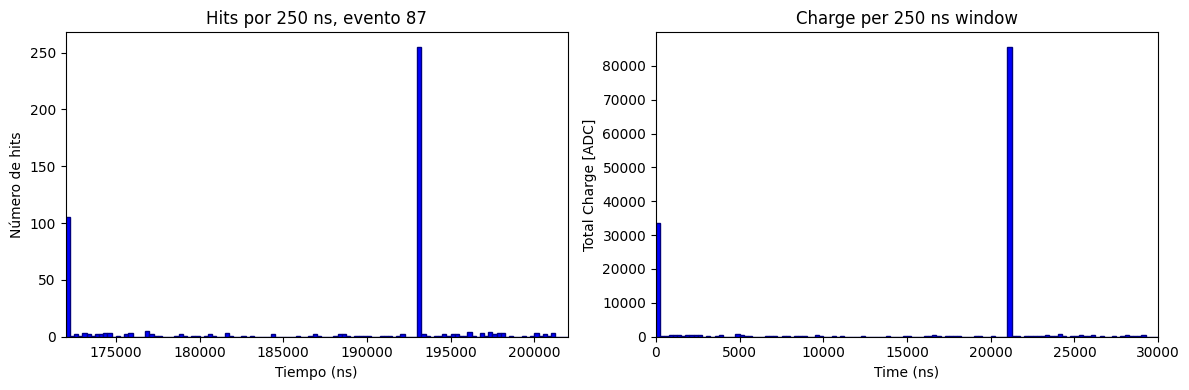

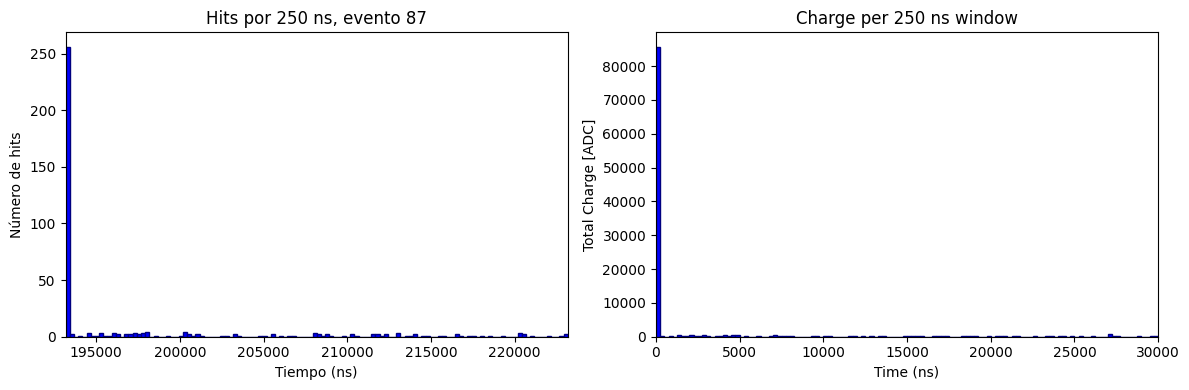

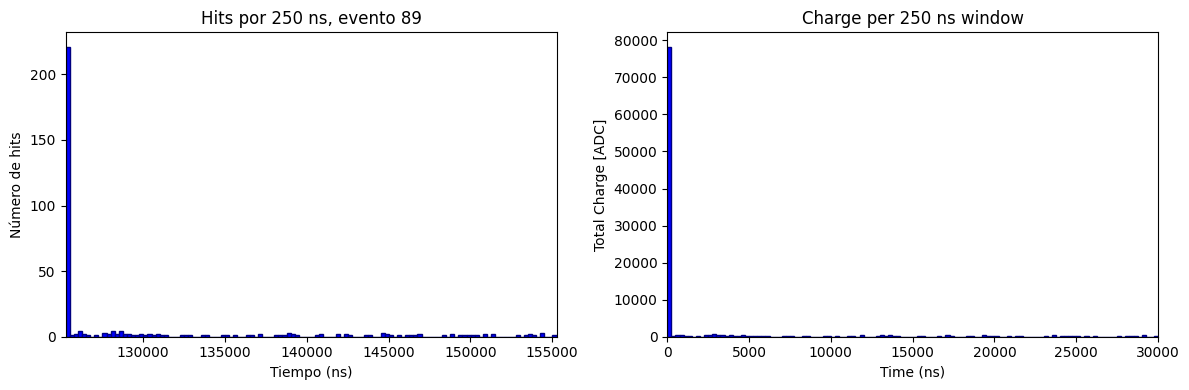

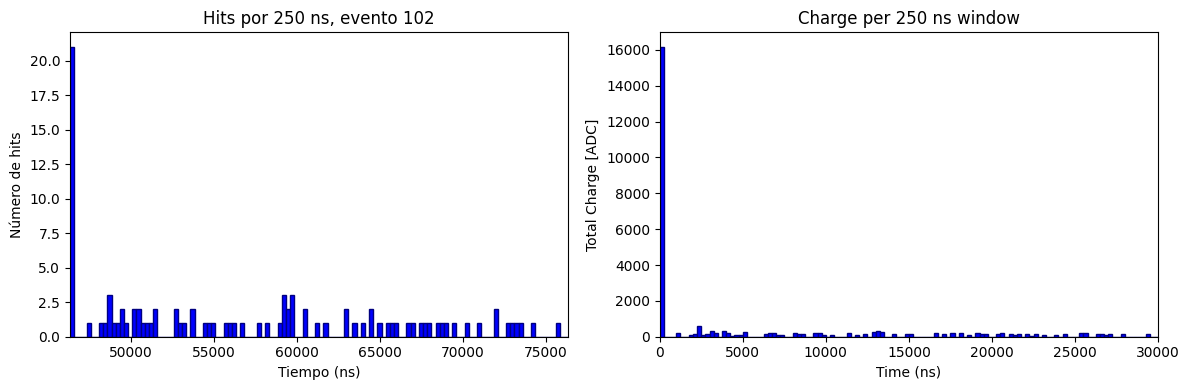

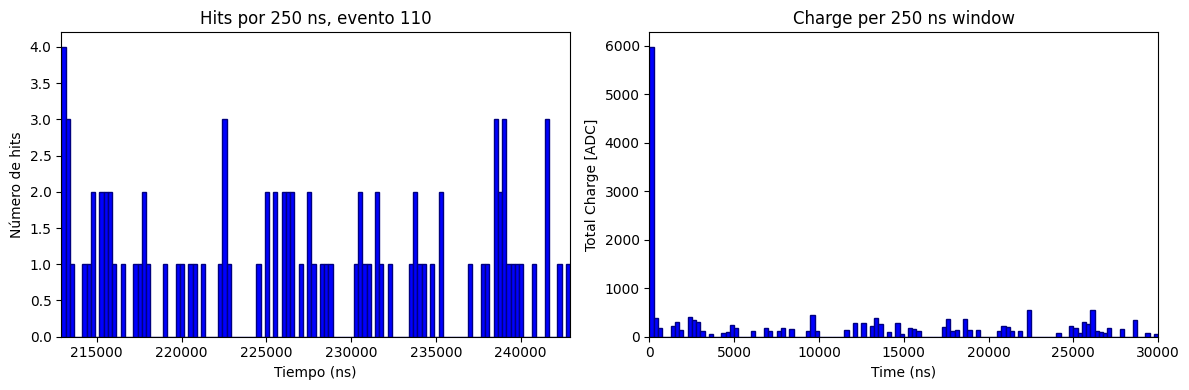

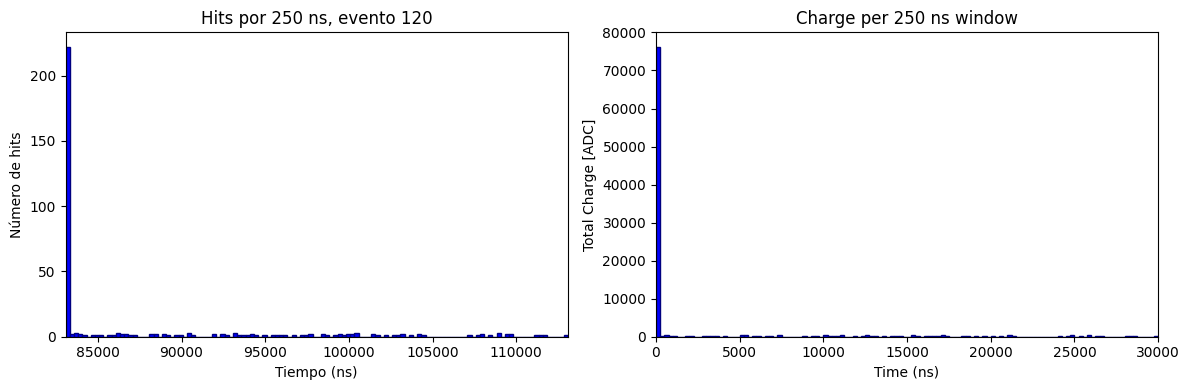

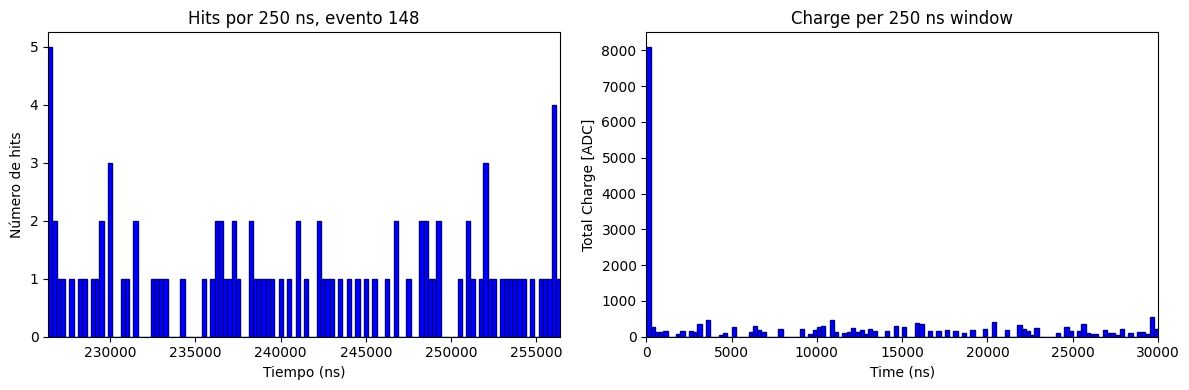

'\n        plt.figure(figsize=(8, 4))\n        plt.hist(charge, bins=100, color=\'blue\', edgecolor=\'navy\')\n        plt.xlabel(\'Charge (u.a)\')\n        plt.ylabel(\'Número de hits\')\n        plt.title("Histograma Charge in 50ns window")\n        plt.show()'

In [17]:
trigger_times_half = dict(list(threshold_charges.items())[0:10])
bin_time = 250
delta = 30000

for event_number in trigger_times_half:
    for start_time in trigger_times_half[event_number]:
        times_branch_event = times_branch[event_number]
        charges_branch_event = charge_branch[event_number]

        mask = (times_branch_event >= start_time) & (times_branch_event < start_time + delta)

        time = times_branch_event[mask]
        charge = charges_branch_event[mask]

        plt.style.use('default')
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # --- Subplot 2: Histograma de número de hits en ventanas de 10 ns ---
        axs[0].hist(time, range=(start_time, start_time + delta), bins=int(delta/bin_time), color='blue', edgecolor='navy')
        axs[0].set_xlabel('Tiempo (ns)')
        axs[0].set_ylabel('Número de hits')
        axs[0].set_title(f"Hits por {bin_time} ns, evento {event_number}")
        axs[0].set_xlim(start_time, start_time+delta)
        #axs[0].set_yscale('log')

        sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, delta)

        axs[1].bar(np.arange(0, 0+delta, bin_time), sum_charges, width = bin_time, color='blue',  align='edge', edgecolor='navy')
        axs[1].set_xlabel("Time (ns)")
        axs[1].set_ylabel("Total Charge [ADC]")
        axs[1].set_title(f"Charge per {bin_time} ns window")
        axs[1].set_xlim(0, delta)
        #axs[1].set_yscale('log')
        plt.tight_layout()
        plt.show()
"""
        plt.figure(figsize=(8, 4))
        plt.hist(charge, bins=100, color='blue', edgecolor='navy')
        plt.xlabel('Charge (u.a)')
        plt.ylabel('Número de hits')
        plt.title("Histograma Charge in 50ns window")
        plt.show()"""

In [18]:
window_ns = 100

times_branch_sup5 = []
for event in event_number_branch:

    if event in threshold_times_50.keys():
    
        all_hits = [t for ref_time in threshold_times_50[event]
            for t in times_branch_modified_chargesTT[event]
            if ref_time <= t <= ref_time + window_ns]
    else:
        all_hits = []
    
    times_branch_sup5.append(np.array(all_hits))

times_branch_sup5_sig = []
for event in event_number_branch_sig:
    if event in  threshold_times_50_sig.keys():

        all_hits = [t for ref_time in threshold_times_50_sig[event]
            for t in times_branch_modified_chargesTT_sig[event]
            if ref_time <= t <= ref_time + window_ns]
    else:
        all_hits= []
    times_branch_sup5_sig.append(np.array(all_hits))

In [19]:
def lista_complementaria_eventos(lista1, lista2):
    """
    Devuelve una lista de arrays, cada uno es el complementario de lista2 respecto a lista1 para cada evento.
    """
    return [np.array([x for x in arr1 if x not in arr2])
            for arr1, arr2 in zip(lista1, lista2)]

times_branch_inf5 = lista_complementaria_eventos(times_branch_modified_chargesTT, times_branch_sup5)
times_branch_inf5_sig = lista_complementaria_eventos(times_branch_modified_chargesTT_sig, times_branch_sup5_sig)


In [20]:
print(times_branch_modified_chargesTT_sig[0])

[   598.86030289    822.66447044   1601.89079881 ... 269498.96531558
 269646.17341961 269996.50976566]


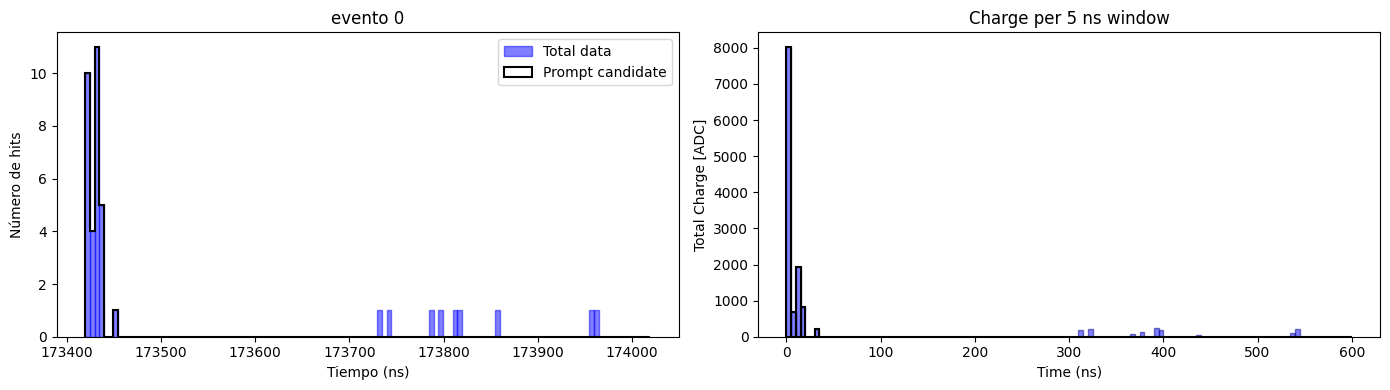

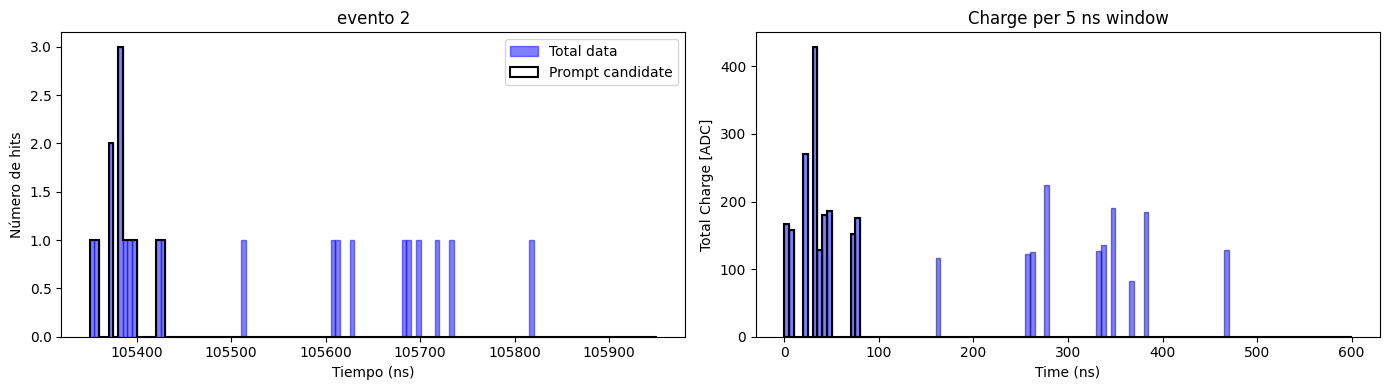

In [21]:
threshold_times_50_cutted = dict(list(threshold_times_50_sig.items())[0:2])

for event_number in threshold_times_50_cutted:
    for start_time in threshold_times_50_cutted[event_number]:

        indices_en_rango = np.where((times_branch_modified_chargesTT_sig[event_number] >= start_time) & (times_branch_modified_chargesTT_sig[event_number] < start_time + 600))[0]
        charge = charge_branch_modified_chargesTT_sig[event_number][indices_en_rango]
        time = times_branch_modified_chargesTT_sig[event_number][indices_en_rango]

        bin_time =  5
        sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, 600)

        set_sup5 = set(times_branch_sup5_sig[event_number])

        # Encontramos los índices en la primera lista cuyos elementos están en la segunda
        matching_indices = [i for i, val in enumerate(times_branch_modified_chargesTT_sig[event_number]) if val in set_sup5]

        charges_sup5 = charge_branch_modified_chargesTT_sig[event_number][matching_indices]

        indices_en_rango = np.where((times_branch_sup5_sig[event_number] >= start_time) & (times_branch_sup5_sig[event_number] < start_time + 600))[0]
        charge = charges_sup5[indices_en_rango]
        time = times_branch_sup5_sig[event_number][indices_en_rango]

        sum_charges_sup5 = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, 600)
    

        fig, axs = plt.subplots(1, 2, figsize=(14, 4))

        # Left: Histogram of hits
        axs[0].hist(
            times_branch_modified_chargesTT_sig[event_number],
            range=[start_time, start_time + 600],
            bins=120,
            color='blue',
            edgecolor='blue',
            alpha=0.5,
            label="Total data"
        )
        axs[0].hist(
            times_branch_sup5_sig[event_number],
            range=[start_time, start_time + 600],
            bins=120,
            histtype='step',
            color='black',
            linewidth=1.5,
            label="Prompt candidate"
        )
        axs[0].set_xlabel('Tiempo (ns)')
        axs[0].set_ylabel('Número de hits')
        axs[0].set_title(f'evento {event_number}')
        axs[0].legend()

        # Right: Bar plot of charges
        axs[1].bar(
            np.arange(0, 0 + 600, bin_time),
            sum_charges,
            width=bin_time,
            color='blue',
            align='edge',
            edgecolor='navy',
            alpha=0.5, 
            label="Total data"
        )
        axs[1].bar(
            np.arange(0, 0 + 600, bin_time),
            sum_charges_sup5,
            width=bin_time,
            facecolor='none',
            align='edge',
            edgecolor='black', 
            linewidth=1.5,
            label="Prompt candidate"
        )
        axs[1].set_xlabel("Time (ns)")
        axs[1].set_ylabel("Total Charge [ADC]")
        axs[1].set_title(f"Charge per {bin_time} ns window")

        plt.tight_layout()
        plt.show()


In [ ]:
neutron_dict = functions_spills.neutron_detection(event_number_branch, times_branch_modified_chargesTT,  threshold_times_50, 100000, 100, 10, 30)
neutron_dict_sig = functions_spills.neutron_detection(event_number_branch_sig, times_branch_modified_chargesTT_sig,  threshold_times_50_sig, 100000, 100, 10, 30)

Event 0 has no threshold times, skipping neutron detection.
Event 5 has no threshold times, skipping neutron detection.
Event 6 has no threshold times, skipping neutron detection.
Event 7 has no threshold times, skipping neutron detection.
Event 8 has no threshold times, skipping neutron detection.
Event 10 has no threshold times, skipping neutron detection.
Event 11 has no threshold times, skipping neutron detection.
Event 12 has no threshold times, skipping neutron detection.
Event 18 has no threshold times, skipping neutron detection.
Event 19 has no threshold times, skipping neutron detection.
Event 20 has no threshold times, skipping neutron detection.
Event 22 has no threshold times, skipping neutron detection.
Event 25 has no threshold times, skipping neutron detection.
Event 26 has no threshold times, skipping neutron detection.
Event 27 has no threshold times, skipping neutron detection.
Event 28 has no threshold times, skipping neutron detection.
Event 29 has no threshold tim

In [23]:
print(threshold_times_50_sig)
print(neutron_dict_sig)

{0: [173419.59429004797], 2: [105350.41497222228], 6: [137162.1998409207], 9: [89868.15052268506], 10: [224146.84127213727], 11: [189218.65378835282, 228115.837841617], 12: [138815.36196319238, 155180.8227398277, 177495.1964535463, 192311.44405622475], 13: [14404.670389199531], 17: [22211.2534171625], 18: [109288.08283023477], 25: [74283.84189384435, 146989.55924966244], 26: [2860.5894205609366, 132044.46053607078, 252526.6037927086], 28: [49733.82082799895], 34: [61372.38467752161], 36: [158963.36508688936], 38: [49943.35939266451, 102154.77605849202], 39: [227767.57433576207], 43: [105305.5280387973], 45: [149556.5321455078], 46: [7695.393718625066, 51292.91973151974, 124161.50787458428, 148485.87315326204], 47: [160477.26305757381], 48: [27113.605210891885, 179211.54387487166], 49: [173576.90382548736, 221967.53153192007], 51: [87790.98924074497], 52: [48283.21615404427], 54: [207098.08838562536], 55: [67272.28749425229, 234150.57084952612], 56: [173132.40605328872], 57: [148077.150

{14: {66510.37811512145: [72238.88700649944]}, 23: {54681.32159514619: [59643.4601574205, 91194.15013080109], 59643.4601574205: [91194.15013080109]}, 52: {68814.39676057157: [92020.60827400422], 92020.60827400422: [181229.81134722693]}, 105: {88196.09461970323: [159935.33843535016]}, 107: {166445.55894814405: [241759.33437676504]}, 143: {117925.01467964846: [181770.50466303824]}, 145: {181616.9678006991: [182941.70412713388]}, 180: {76387.21233355175: [77947.50401940894, 120554.93775702703]}, 196: {17887.313646325645: [40630.1330356839]}, 251: {170599.04519757518: [172637.35494033466]}, 268: {240448.64164381457: [252141.42491103467]}, 275: {125135.58027158334: [136241.26772329633]}, 290: {177087.90347605888: [268940.69513066404]}, 326: {133872.65666079533: [174694.5523658011]}, 330: {35565.51694194287: [67557.22789945063]}, 358: {51954.97116583655: [65708.45333456762]}, 392: {146388.81881257673: [175604.10946513803, 189941.5405203324, 197431.7137147154], 175604.10946513803: [189941.540

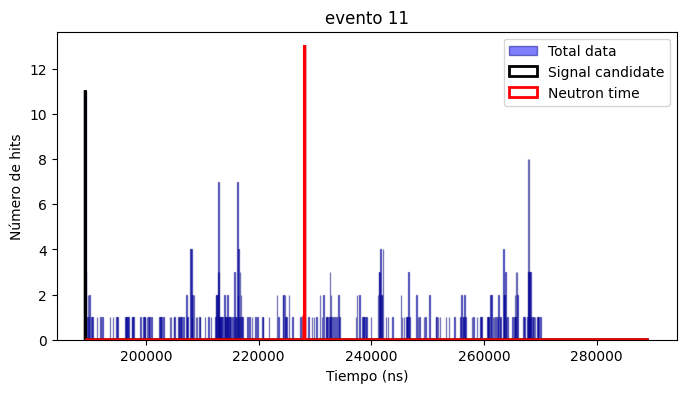

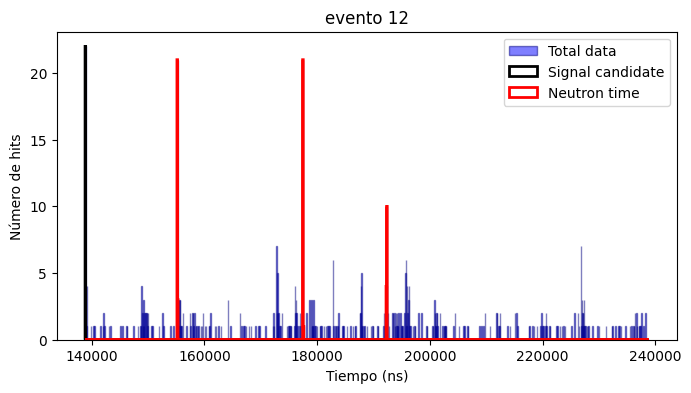

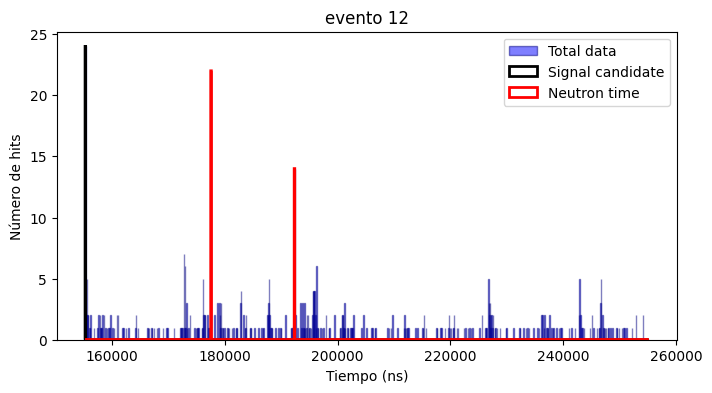

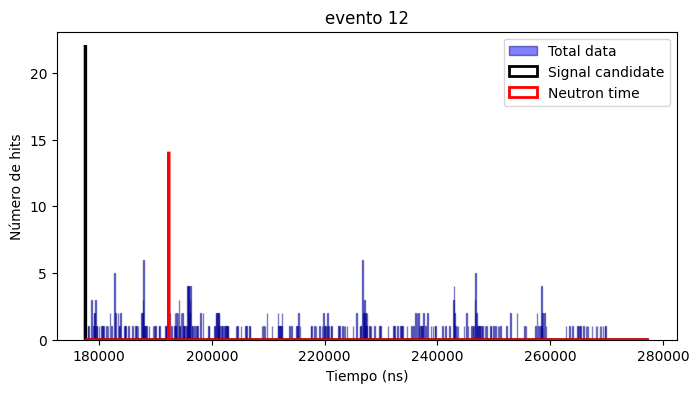

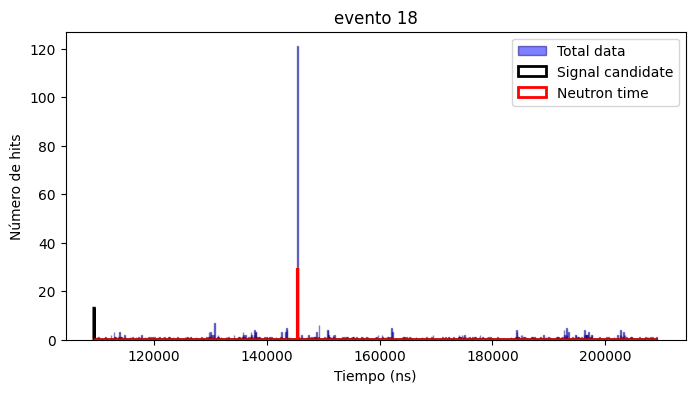

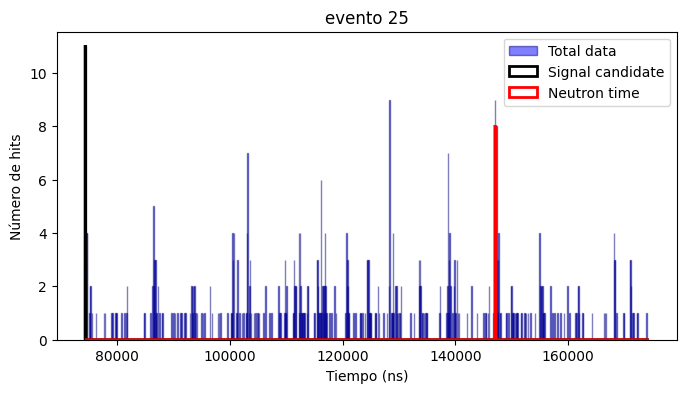

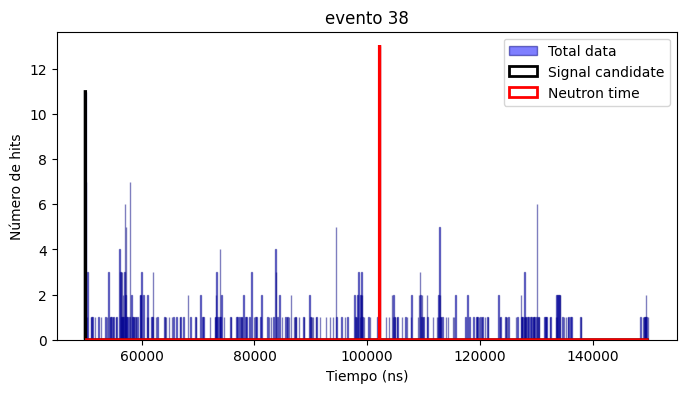

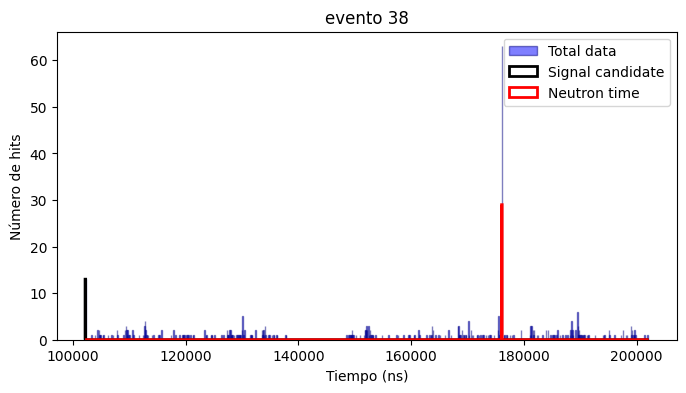

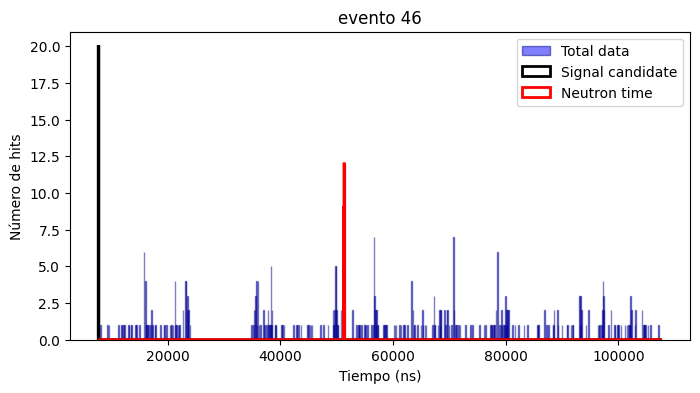

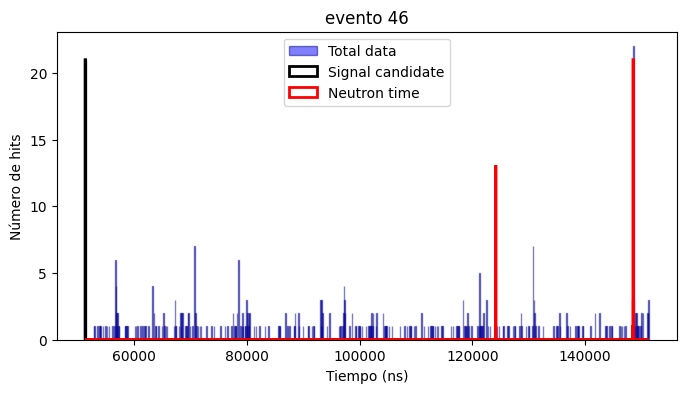

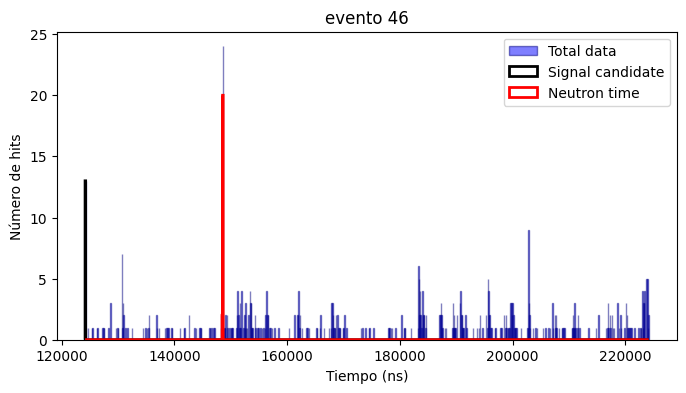

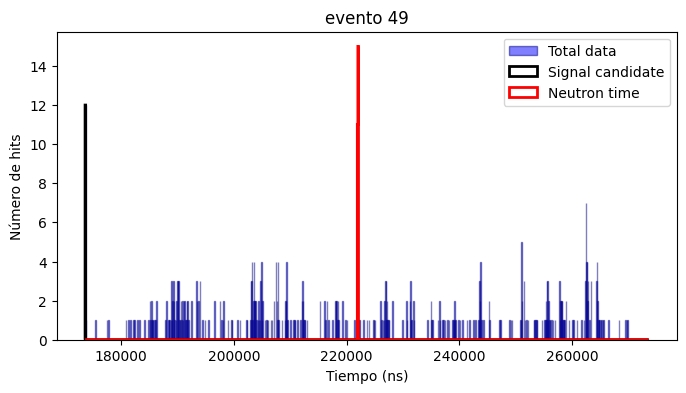

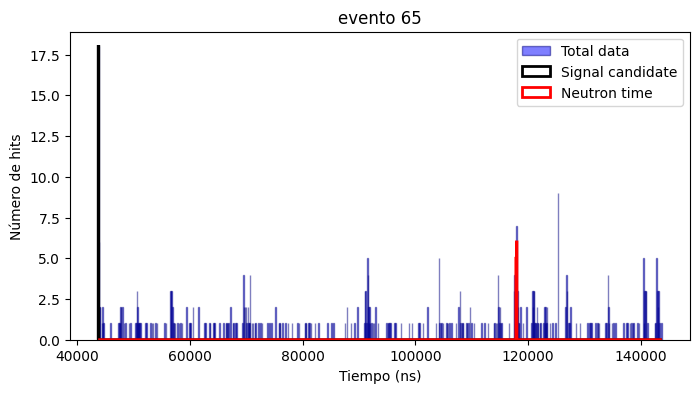

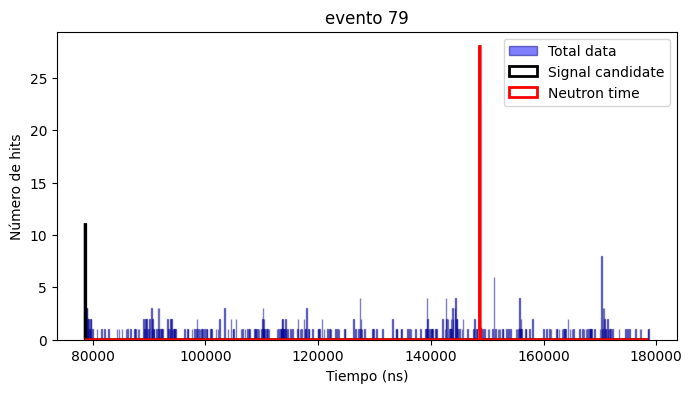

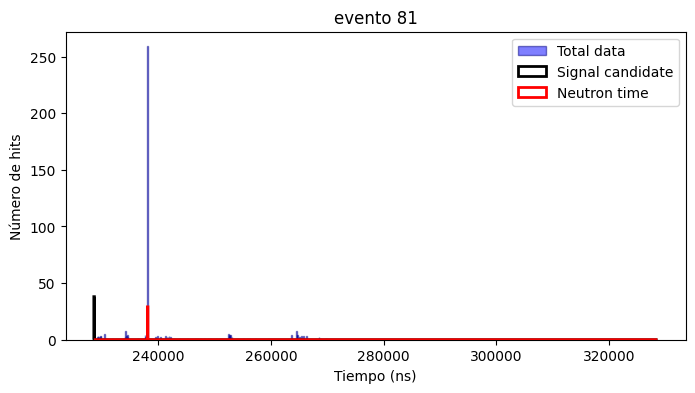

In [24]:
neutron_dict_cut = dict(list(neutron_dict_sig.items())[0:10])

print(neutron_dict)

for event_number in neutron_dict_cut:
    for start_time in neutron_dict_cut[event_number]:

        neutron_times = neutron_dict_cut[event_number][start_time]

        bin_edges = np.arange(start_time, start_time + 100001, 100)  # 120 bins

        plt.figure(figsize=(8, 4))
        plt.hist(
            times_branch_modified_chargesTT_sig[event_number],
            bins=bin_edges,
            color='blue',
            edgecolor='navy',
            alpha=0.5,
            label="Total data"
        )
        mask = (times_branch_sup5_sig[event_number] >= start_time) & (times_branch_sup5_sig[event_number] < start_time + 100)
        plt.hist(
            times_branch_sup5_sig[event_number][mask],
            bins=bin_edges,
            histtype='step',
            color='black',
            linewidth=2,
            label="Signal candidate"
        )
        for t in neutron_times:
            mask = (times_branch_modified_chargesTT_sig[event_number] >= t) & (times_branch_modified_chargesTT_sig[event_number] <= t + 100)
            plt.hist(
                times_branch_modified_chargesTT_sig[event_number][mask],
                bins=bin_edges,
                histtype='step',
                color='red',
                linewidth=2,
                label='Neutron time' if t == neutron_times[0] else None
            )
        plt.xlabel('Tiempo (ns)')
        plt.ylabel('Número de hits')
        plt.title(f'evento {event_number}')
        plt.legend()
        plt.show()

In [25]:
print(sum(len(v) for v in neutron_dict.values()))
print(sum(len(v) for v in threshold_times_50.values()))

print(sum(len(v) for v in neutron_dict_sig.values()))
print(sum(len(v) for v in threshold_times_50_sig.values()))

93
566
178
772


In [26]:
print(neutron_dict)
deltaT = []
for event_number in neutron_dict:
    for start_time in neutron_dict[event_number]:
        neutron_times = neutron_dict[event_number][start_time]
        deltaT.append(min(neutron_times) - start_time)

print(deltaT)
print(np.mean(deltaT))


print(neutron_dict_sig)
deltaT_sig = []
for event_number in neutron_dict_sig:
    for start_time in neutron_dict_sig[event_number]:
        neutron_times = neutron_dict_sig[event_number][start_time]
        deltaT_sig.append(min(neutron_times) - start_time)

print(deltaT_sig)
print(np.mean(deltaT_sig))


{14: {66510.37811512145: [72238.88700649944]}, 23: {54681.32159514619: [59643.4601574205, 91194.15013080109], 59643.4601574205: [91194.15013080109]}, 52: {68814.39676057157: [92020.60827400422], 92020.60827400422: [181229.81134722693]}, 105: {88196.09461970323: [159935.33843535016]}, 107: {166445.55894814405: [241759.33437676504]}, 143: {117925.01467964846: [181770.50466303824]}, 145: {181616.9678006991: [182941.70412713388]}, 180: {76387.21233355175: [77947.50401940894, 120554.93775702703]}, 196: {17887.313646325645: [40630.1330356839]}, 251: {170599.04519757518: [172637.35494033466]}, 268: {240448.64164381457: [252141.42491103467]}, 275: {125135.58027158334: [136241.26772329633]}, 290: {177087.90347605888: [268940.69513066404]}, 326: {133872.65666079533: [174694.5523658011]}, 330: {35565.51694194287: [67557.22789945063]}, 358: {51954.97116583655: [65708.45333456762]}, 392: {146388.81881257673: [175604.10946513803, 189941.5405203324, 197431.7137147154], 175604.10946513803: [189941.540

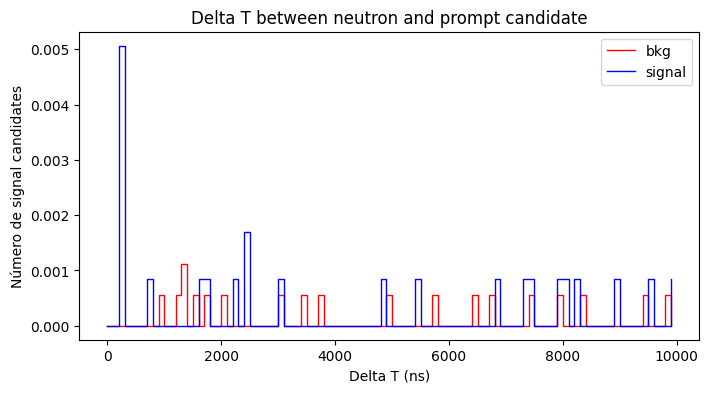

In [27]:
hist, bins_edges = np.histogram(deltaT, bins=100, range=(0, 10000))
hist_sig, _ = np.histogram(deltaT_sig, bins=bins_edges, range=(0, 10000))

plt.figure(figsize=(8, 4))

plt.step(bins_edges[:-1], hist/N_events, where='post', linewidth=1, label='bkg', color='red')
plt.step(bins_edges[:-1], hist_sig/N_events_sig, where='post', linewidth=1, label='signal', color='blue')
plt.xlabel('Delta T (ns)')
plt.ylabel('Número de signal candidates')
plt.title('Delta T between neutron and prompt candidate')
plt.legend()
plt.show()

In [28]:
nDetections_event_inf5 = []
nDetections_event_sup5 = []


for x in times_branch_modified_50:
    nDetections_event_inf5.append(len(x))

for x in times_branch_sup5:
    nDetections_event_sup5.append(len(x))

nDetections_event_inf5_sig = []
nDetections_event_sup5_sig = []


for x in times_branch_modified_50_sig:
    nDetections_event_inf5_sig.append(len(x))

for x in times_branch_sup5_sig:
    nDetections_event_sup5_sig.append(len(x))

NameError: name 'times_branch_modified_50' is not defined

In [ ]:
max_hist = 6500
bin_hist =  100#max_hist / n_bins  
n_bins = int(max_hist / bin_hist)


hist_inf_5, _ = np.histogram(nDetections_event_inf5, bins = bin_edges)
hist_inf_5_sig, _ = np.histogram(nDetections_event_inf5_sig, bins = bin_edges)

hist_sup_5, bin_edges_2 = np.histogram(nDetections_event_sup5, bins = n_bins)
hist_sup_5_sig, _ = np.histogram(nDetections_event_sup5_sig, bins = bin_edges_2)


plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges[:-1], hist_inf_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges[:-1], hist_inf_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('window 50 ns nhits <50')
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges_2[:-1], hist_sup_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges_2[:-1], hist_sup_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('window 50 ns nhits >50')
#plt.yscale("log")
plt.show()


In [ ]:
bin_window = 4000

nHits_inf5 = functions_spills.counting_nHits_window(event_number_branch, times_branch_modified_50, bin_window)
nHits_sup5 = functions_spills.counting_nHits_window(event_number_branch, times_branch_sup5, bin_window)

nHits_inf5_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_modified_50_sig, bin_window)
nHits_sup5_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_sup5_sig, bin_window)


In [ ]:
n_bins = 100

hist_inf_5, bin_inf5 = np.histogram(nHits_inf5, np.arange(0, 11, 1))
hist_inf_5_sig, _ = np.histogram(nHits_inf5_sig, bins = bin_inf5)

hist_sup_5, bin_edges_2 = np.histogram(nHits_sup5, np.arange(0, 50, 2))
hist_sup_5_sig, _ = np.histogram(nHits_sup5_sig, bins = bin_edges_2)


In [ ]:

plt.figure(figsize=(10, 6))
plt.step(bin_inf5[:-1], hist_inf_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_inf5[:-1], hist_inf_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.ylabel("Number of windows")
plt.xlabel(f"hits in {bin_window} ns")
plt.title("window 50 ns nhits <5")
#plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.step(bin_edges_2[:-1], hist_sup_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges_2[:-1], hist_sup_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.ylabel("Number of windows")
plt.xlabel(f"hits in {bin_window} ns")
plt.title("window 50 ns nhits >5")
#plt.yscale('log')
plt.legend()
plt.show()